<img src="./image/Title.png">

### 패키지 import 및 bundle 객체 선언

In [1]:
import cv2
import numpy as np
import modi
import time

Running PyMODI (v1.0.1)


In [2]:
bundle = modi.MODI(ai_mode=True)
ai_cam = bundle.ai_cameras[0]
motor = bundle.motors[0]
print('bundle finish')

Initiating can connection...
Start initializing connected MODI modules
Motor (2352) has been connected!
MODI modules are initialized!
MODI AI modules are initialized!
bundle finish


### 선 이미지 출력 함수

In [3]:
def t_display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

### Canny function
##### 윤곽선 추출

In [4]:
# Canny 이미지 처리함수
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

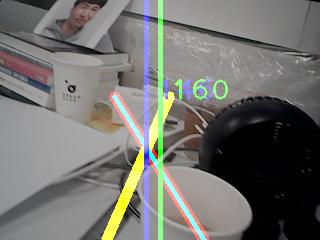

KeyboardInterrupt: 

In [5]:
ai_cam.set_window()
ai_cam.set_frame_height(320)
ai_cam.set_frame_weight(240)
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    ai_cam.show(canny_image)

### ROI (Region Of Interest)
##### 영역 설정

In [6]:
# Roi 설정 함수 (카메라 화각이 좁은 관계로 화면 전체를 잡은 상태)
def region_of_interest(image):
    width = image.shape[1]
#     polygons = np.array([[(0,320),(width,320),(width,0),(0,0)]])
    polygons = np.array([[(0,50), (width,50),(width,480),(0,480)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

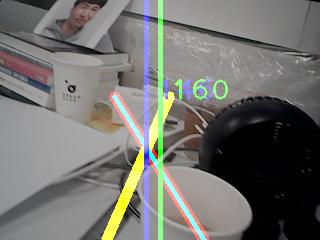

KeyboardInterrupt: 

In [7]:
ai_cam.set_window()
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    ai_cam.show(cropped_image)

### Hough Lines
##### 직선 추출

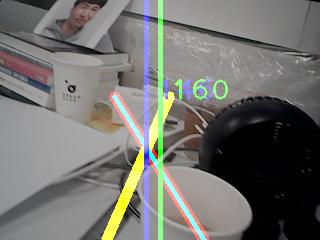

KeyboardInterrupt: 

In [8]:
ai_cam.set_window()
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    
#     lines = cv2.HoughLinesP(cropped_image, 0.8 , np.pi/180, 10, np.array([]), minLineLength=40, maxLineGap=200)
    lines = cv2.HoughLinesP(cropped_image, 7 , np.pi/180, 41, np.array([]), minLineLength=25, maxLineGap=20)
    frame_lines = t_display_lines(frame, lines)
    
    combo_image = cv2.addWeighted(frame, 0.8, frame_lines, 1, 1)
    
    ai_cam.show(combo_image)

### Average Slope
##### 기울기 처리

In [9]:
# 선 좌표 처리함수
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(2/5))
    
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

# 선 기울기 처리함수
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < -0.5:
            left_fit.append((slope, intercept))
        elif 0.5 < slope:
            right_fit.append((slope, intercept))
    if (len(left_fit) != 0):
        left_fit_average = np.average(left_fit, axis=0)
    else:
        left_fit_average = ((-5, 240))
    if (len(right_fit) != 0):
        right_fit_average = np.average(right_fit, axis=0)
    else:
        right_fit_average = ((5, -1360))
    left_line = make_coordinates(image, left_fit_average)
    
    rigth_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, rigth_line])


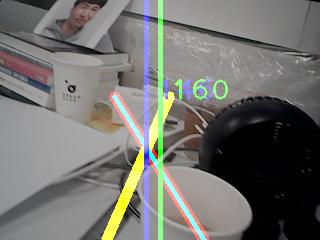

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

KeyboardInterrupt: 

In [10]:

ai_cam.set_window()
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    
#     lines = cv2.HoughLinesP(cropped_image, 0.7 , np.pi/180, 50, np.array([]), minLineLength=1, maxLineGap=1)
#     lines = cv2.HoughLinesP(cropped_image, 0.8 , np.pi/180, 10, np.array([]), minLineLength=100, maxLineGap=200)
    lines = cv2.HoughLinesP(cropped_image, 7 , np.pi/180, 41, np.array([]), minLineLength=25, maxLineGap=20)
    
    if str(type(lines)) == "<class 'NoneType'>":
        lines = [[[0, 0 ,0 ,0]]]
    elif len(lines) < 2:
        continue

    # 선분이 2개 검출될때 실행 
    if len(lines) >= 2 :
        averaged_lines = average_slope_intercept(frame, lines)
            
        frame_lines = t_display_lines(frame, averaged_lines)

        combo_image = cv2.addWeighted(frame, 0.8, frame_lines, 1, 1)

        ai_cam.show(combo_image)

### Find Vanishing
##### 소실점 추출

In [11]:
# 중심 축과 검출된 선들의 중심축 좌표 출력 함수 
def find_vanishing(image, lines):
    
    x11, y11, x12, y12 = lines[0]
    cv2.line(image, (x11, y11), (x12, y12), (255, 255, 0), 10)
    x21, y21, x22, y22 = lines[1]
    cv2.line(image, (x21, y21), (x22, y22), (0, 255, 255), 3)
    m1 = (y12 - y11) / (x12 - x11)
    m2 = ((y22 - y21) / (x22 - x21)) -0.001
    cx = int((x11 * m1 - y11 - x21 * m2 + y21) / (m1 - m2))
    center = int(image.shape[1]/2)

    
    cv2.line(image, (cx, 0), (cx, image.shape[0]), (0, 0, 255), 3) 
    cv2.putText(image, str(cx), (cx+10, 100), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    cv2.line(image, (center, 0), (center, image.shape[0]), (0, 255, 0), 3)
    cv2.putText(image, str(center), (center+10, 100), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

    return image, cx, center


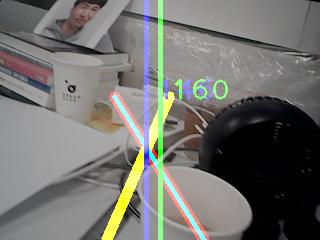

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.p

KeyboardInterrupt: 

In [12]:
ai_cam.set_window()
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    
#     lines = cv2.HoughLinesP(cropped_image, 0.8 , np.pi/180, 15, np.array([]), minLineLength=40, maxLineGap=200)
    lines = cv2.HoughLinesP(cropped_image, 7 , np.pi/180, 41, np.array([]), minLineLength=25, maxLineGap=20)
    
    if str(type(lines)) == "<class 'NoneType'>":
        lines = [[[0, 0 ,0 ,0]]]
    elif len(lines) < 2:
        continue

    # 선분이 2개 검출될때 실행 
    if len(lines) >= 2 :
        averaged_lines = average_slope_intercept(frame, lines)
        line_image = t_display_lines(frame, averaged_lines)
        vanishing_line, vanishing, center = find_vanishing(line_image, averaged_lines)
        combo_image = cv2.addWeighted(frame, 0.8, vanishing_line, 1, 1)
        ai_cam.show(combo_image)

### 모터 & 차량 제어

In [17]:
# # MODI 모터 제어 함수 
# def forward(delay=1, speed=60):
#     motor.speed= 0, 0
# #     time.sleep(0.001)
#     for _ in range(delay):
# #         time.sleep(0.001)
#         motor.speed= speed, -speed
#         time.sleep(0.001)
#     motor.speed =0, 0

# def left(delay=1):
#     motor.speed= 0,0
# #     time.sleep(0.001)
#     for _ in range(delay):
# #         time.sleep(0.001)
#         motor.speed= 60, 60
#         time.sleep(0.001)
#     motor.speed =0, 0

# def right(delay=1):
#     motor.speed = 0, 0
# #     time.sleep(0.001)
#     for _ in range(delay):
# #         time.sleep(0.001)
#         motor.speed= -60, -60
#         time.sleep(0.001)
#     motor.speed = 0, 0

    
# MODI 모터 제어 함수 
def forward():
    motor.speed= 30, -30
#     time.sleep(0.001)
#     motor.speed= 0,0

def left():
    motor.speed= 35, -25
#     time.sleep(0.001)
#     motor.speed= 0,0

def right():
    motor.speed = 25, -35
#     time.sleep(0.001)
#     motor.speed= 0,0
    
    
# 차량 이동 함수 
def find_way(vanishing, center):
    diff = vanishing - center
    if diff < -15:
        left()
        if diff < -40:
            motor.speed= 50, -25
    elif diff > 15:
        right()
        if diff > 40:
            motor.speed= 25, -50
    else:
        forward()

In [ ]:
ai_cam.set_window()
while True:
    frame = ai_cam.read()
    frame = cv2.flip(frame, 1)
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    
#     lines = cv2.HoughLinesP(cropped_image, 0.8 , np.pi/180, 15, np.array([]), minLineLength=40, maxLineGap=200)
    lines = cv2.HoughLinesP(cropped_image, 7 , np.pi/180, 41, np.array([]), minLineLength=25, maxLineGap=20)
    
    if str(type(lines)) == "<class 'NoneType'>":
        lines = [[[0, 0 ,0 ,0]]]
    elif len(lines) < 2:
        continue

    # 선분이 2개 검출될때 실행 
    if len(lines) >= 2 :
        averaged_lines = average_slope_intercept(frame, lines)
        line_image = t_display_lines(frame, averaged_lines)
        vanishing_line, vanishing, center = find_vanishing(line_image, averaged_lines)
        combo_image = cv2.addWeighted(frame, 0.8, vanishing_line, 1, 1)
        ai_cam.show(combo_image)
        find_way(vanishing, center)

# 확인 문제

### Open CV 이미지 처리

#### 1. 직선을 1개만 추출하려면 어떻게 해야할까요?
#### 2. canny를 적용하지 않고 나머지 코드를 실행하면 어떤 결과가 나올까요?
#### 3. grayscale을 적용하지 않고 나머지 코드를 실행하면 어떤 결과가 나올까요?